## Predicting taxi out time with a linear regression model

This model predicts taxi out time for planes at JFK airport.

The dataset was taken from an Academic Paper under Review by IEEE transportation and can be found on [Kaggle](https://www.kaggle.com/datasets/deepankurk/flight-take-off-data-jfk-airport). It contains data about flights leaving from JKF airport between November 2019 and December 2020.


In [1]:
## Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

In [2]:
## Load the dataset
data = pd.read_csv('M1_final.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
## Move TAXI_OUT column to the front for easy viewing
data = data[['TAXI_OUT'] + [x for x in data.columns if x != 'TAXI_OUT']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TAXI_OUT           28820 non-null  int64  
 1   MONTH              28820 non-null  int64  
 2   DAY_OF_MONTH       28820 non-null  int64  
 3   DAY_OF_WEEK        28820 non-null  int64  
 4   OP_UNIQUE_CARRIER  28820 non-null  object 
 5   TAIL_NUM           28820 non-null  object 
 6   DEST               28820 non-null  object 
 7   DEP_DELAY          28820 non-null  int64  
 8   CRS_ELAPSED_TIME   28820 non-null  int64  
 9   DISTANCE           28820 non-null  int64  
 10  CRS_DEP_M          28820 non-null  int64  
 11  DEP_TIME_M         28820 non-null  int64  
 12  CRS_ARR_M          28820 non-null  int64  
 13  Temperature        28820 non-null  int64  
 14  Dew Point          28820 non-null  object 
 15  Humidity           28820 non-null  int64  
 16  Wind               288

In [5]:
data.describe()

,TAXI_OUT,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,20.858570,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130
std,6.851915,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043
min,5.000000,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000
25%,16.000000,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000
50%,19.000000,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000
75%,25.000000,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000
max,41.000000,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000


In [6]:
## Drop NaN values from Wind column
data.dropna(subset = ['Wind'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TAXI_OUT           28818 non-null  int64  
 1   MONTH              28818 non-null  int64  
 2   DAY_OF_MONTH       28818 non-null  int64  
 3   DAY_OF_WEEK        28818 non-null  int64  
 4   OP_UNIQUE_CARRIER  28818 non-null  object 
 5   TAIL_NUM           28818 non-null  object 
 6   DEST               28818 non-null  object 
 7   DEP_DELAY          28818 non-null  int64  
 8   CRS_ELAPSED_TIME   28818 non-null  int64  
 9   DISTANCE           28818 non-null  int64  
 10  CRS_DEP_M          28818 non-null  int64  
 11  DEP_TIME_M         28818 non-null  int64  
 12  CRS_ARR_M          28818 non-null  int64  
 13  Temperature        28818 non-null  int64  
 14  Dew Point          28818 non-null  object 
 15  Humidity           28818 non-null  int64  
 16  Wind               28818 no

## Making useable variables

Several columns have object datatypes. Let's turn them into integers that can be used by the model.

The Dew Point column has numerical values but the dtype is object. These can be turned into integers.

In [7]:
## Turning Dew Point into an integer
data['Dew Point'] = data['Dew Point'].astype(str)
data['Dew Point'] = data['Dew Point'].str.replace(u'\xa0', u' ')
data['Dew Point'] = data['Dew Point'].str.strip()
data['Dew Point'] = pd.to_numeric(data['Dew Point'])

OP_UNIQUE_CARRIER, TAIL_NUM, DEST, Wind, and Condition impact taxi out time by varying degrees. Using mean encoding, we can turn categorical values into numerical values based on each category's mean taxi out time, assigning them a more meaningful number than other encoding methods.

In [8]:
## Mean encoding OP_UNIQUE_CARRIER
mean_encoded_ouc = data.groupby(['OP_UNIQUE_CARRIER'])['TAXI_OUT'].mean().to_dict()
data['OUC_enc'] = data['OP_UNIQUE_CARRIER'].map(mean_encoded_ouc) 
data.head()

,TAXI_OUT,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,OUC_enc
0,14,11,1,5,B6,N828JB,CHS,-1,124,636,...,34,58,W,25,38,29.86,Fair / Windy,9,17,19.557363
1,15,11,1,5,B6,N992JB,LAX,-7,371,2475,...,34,58,W,25,38,29.86,Fair / Windy,9,17,19.557363
2,22,11,1,5,B6,N959JB,FLL,40,181,1069,...,34,58,W,25,38,29.86,Fair / Windy,9,17,19.557363
3,12,11,1,5,B6,N999JQ,MCO,-2,168,944,...,34,58,W,25,38,29.86,Fair / Windy,9,17,19.557363
4,13,11,1,5,DL,N880DN,ATL,-4,139,760,...,32,58,W,24,35,29.91,Fair / Windy,9,17,21.615755


In [9]:
## Mean encoding TAIL_NUM
mean_encoded_tailnum = data.groupby(['TAIL_NUM'])['TAXI_OUT'].mean().to_dict()
data['tailnum_enc'] = data['TAIL_NUM'].map(mean_encoded_tailnum) 
data.head()

,TAXI_OUT,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,OUC_enc,tailnum_enc
0,14,11,1,5,B6,N828JB,CHS,-1,124,636,...,58,W,25,38,29.86,Fair / Windy,9,17,19.557363,20.290323
1,15,11,1,5,B6,N992JB,LAX,-7,371,2475,...,58,W,25,38,29.86,Fair / Windy,9,17,19.557363,19.920000
2,22,11,1,5,B6,N959JB,FLL,40,181,1069,...,58,W,25,38,29.86,Fair / Windy,9,17,19.557363,18.850000
3,12,11,1,5,B6,N999JQ,MCO,-2,168,944,...,58,W,25,38,29.86,Fair / Windy,9,17,19.557363,19.090909
4,13,11,1,5,DL,N880DN,ATL,-4,139,760,...,58,W,24,35,29.91,Fair / Windy,9,17,21.615755,20.666667


In [10]:
## Mean encoding DEST
mean_encoded_dest = data.groupby(['DEST'])['TAXI_OUT'].mean().to_dict()
data['dest_enc'] = data['DEST'].map(mean_encoded_dest) 
data.head()

,TAXI_OUT,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,...,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,OUC_enc,tailnum_enc,dest_enc
0,14,11,1,5,B6,N828JB,CHS,-1,124,636,...,W,25,38,29.86,Fair / Windy,9,17,19.557363,20.290323,19.962466
1,15,11,1,5,B6,N992JB,LAX,-7,371,2475,...,W,25,38,29.86,Fair / Windy,9,17,19.557363,19.920000,21.188299
2,22,11,1,5,B6,N959JB,FLL,40,181,1069,...,W,25,38,29.86,Fair / Windy,9,17,19.557363,18.850000,21.661370
3,12,11,1,5,B6,N999JQ,MCO,-2,168,944,...,W,25,38,29.86,Fair / Windy,9,17,19.557363,19.090909,19.995776
4,13,11,1,5,DL,N880DN,ATL,-4,139,760,...,W,24,35,29.91,Fair / Windy,9,17,21.615755,20.666667,19.272956


In [11]:
## Mean encoding Wind
mean_encoded_wind = data.groupby(['Wind'])['TAXI_OUT'].mean().to_dict()
data['wind_enc'] = data['Wind'].map(mean_encoded_wind) 
data.head()

,TAXI_OUT,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,...,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,OUC_enc,tailnum_enc,dest_enc,wind_enc
0,14,11,1,5,B6,N828JB,CHS,-1,124,636,...,25,38,29.86,Fair / Windy,9,17,19.557363,20.290323,19.962466,20.774519
1,15,11,1,5,B6,N992JB,LAX,-7,371,2475,...,25,38,29.86,Fair / Windy,9,17,19.557363,19.920000,21.188299,20.774519
2,22,11,1,5,B6,N959JB,FLL,40,181,1069,...,25,38,29.86,Fair / Windy,9,17,19.557363,18.850000,21.661370,20.774519
3,12,11,1,5,B6,N999JQ,MCO,-2,168,944,...,25,38,29.86,Fair / Windy,9,17,19.557363,19.090909,19.995776,20.774519
4,13,11,1,5,DL,N880DN,ATL,-4,139,760,...,24,35,29.91,Fair / Windy,9,17,21.615755,20.666667,19.272956,20.774519


In [12]:
## Mean encoding Condition
mean_encoded_cond = data.groupby(['Condition'])['TAXI_OUT'].mean().to_dict()
data['cond_enc'] = data['Condition'].map(mean_encoded_cond) 
data.head()

,TAXI_OUT,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,...,Wind Gust,Pressure,Condition,sch_dep,sch_arr,OUC_enc,tailnum_enc,dest_enc,wind_enc,cond_enc
0,14,11,1,5,B6,N828JB,CHS,-1,124,636,...,38,29.86,Fair / Windy,9,17,19.557363,20.290323,19.962466,20.774519,21.265795
1,15,11,1,5,B6,N992JB,LAX,-7,371,2475,...,38,29.86,Fair / Windy,9,17,19.557363,19.920000,21.188299,20.774519,21.265795
2,22,11,1,5,B6,N959JB,FLL,40,181,1069,...,38,29.86,Fair / Windy,9,17,19.557363,18.850000,21.661370,20.774519,21.265795
3,12,11,1,5,B6,N999JQ,MCO,-2,168,944,...,38,29.86,Fair / Windy,9,17,19.557363,19.090909,19.995776,20.774519,21.265795
4,13,11,1,5,DL,N880DN,ATL,-4,139,760,...,35,29.91,Fair / Windy,9,17,21.615755,20.666667,19.272956,20.774519,21.265795


In [13]:
## Checking the dictionary
mean_encoded_cond

{'Cloudy': 20.258814102564102,
 'Cloudy / Windy': 20.970674486803517,
 'Drizzle and Fog': 32.6,
 'Fair': 20.24096863834855,
 'Fair / Windy': 21.265795206971678,
 'Fog': 24.965986394557824,
 'Fog / Windy': 16.928571428571427,
 'Heavy Rain': 27.037037037037038,
 'Heavy Rain / Windy': 15.833333333333334,
 'Light Drizzle': 21.65979381443299,
 'Light Drizzle / Windy': 29.11111111111111,
 'Light Freezing Rain': 30.0,
 'Light Rain': 22.221447721179626,
 'Light Rain / Windy': 24.666666666666668,
 'Light Snow': 30.13157894736842,
 'Light Snow / Windy': 26.958333333333332,
 'Mostly Cloudy': 20.469085726814296,
 'Mostly Cloudy / Windy': 21.651872399445214,
 'Partly Cloudy': 20.62885634153942,
 'Partly Cloudy / Windy': 22.781786941580755,
 'Rain': 24.014245014245013,
 'Rain / Windy': 24.4,
 'Snow': 35.0,
 'Wintry Mix': 29.265060240963855,
 'Wintry Mix / Windy': 39.0}

In [14]:
## Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TAXI_OUT           28818 non-null  int64  
 1   MONTH              28818 non-null  int64  
 2   DAY_OF_MONTH       28818 non-null  int64  
 3   DAY_OF_WEEK        28818 non-null  int64  
 4   OP_UNIQUE_CARRIER  28818 non-null  object 
 5   TAIL_NUM           28818 non-null  object 
 6   DEST               28818 non-null  object 
 7   DEP_DELAY          28818 non-null  int64  
 8   CRS_ELAPSED_TIME   28818 non-null  int64  
 9   DISTANCE           28818 non-null  int64  
 10  CRS_DEP_M          28818 non-null  int64  
 11  DEP_TIME_M         28818 non-null  int64  
 12  CRS_ARR_M          28818 non-null  int64  
 13  Temperature        28818 non-null  int64  
 14  Dew Point          28818 non-null  int64  
 15  Humidity           28818 non-null  int64  
 16  Wind               28818 no

## Creating the linear regression model

In [15]:
## Dropping uneccessary columns with object values
data.drop(data.columns[[4, 5, 6, 16, 20]], axis=1, inplace=True)

In [16]:
## Exploratory data analysis
## Correlation matrix - sees how each value corellates with one another
corr_mat = data.corr(numeric_only = True)
corr_mat

,TAXI_OUT,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,...,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,OUC_enc,tailnum_enc,dest_enc,wind_enc,cond_enc
TAXI_OUT,1.000000,0.018347,-0.024065,0.028397,0.034759,0.071007,0.060006,0.044562,0.057584,0.071524,...,0.062942,0.095764,-0.059530,0.190374,0.064193,0.185731,0.333456,0.172549,0.110608,0.177170
MONTH,0.018347,1.000000,-0.007274,0.029366,0.046421,-0.016010,-0.000106,0.001732,0.002537,-0.012333,...,-0.034989,-0.050989,-0.085342,-0.006131,-0.019737,-0.011662,-0.001347,0.007903,-0.047807,0.052364
DAY_OF_MONTH,-0.024065,-0.007274,1.000000,-0.029732,-0.036634,0.002779,-0.002746,0.001717,0.004407,0.008533,...,-0.093178,-0.088981,0.016845,-0.003392,0.002210,-0.001920,-0.004206,-0.003816,0.024351,-0.082242
DAY_OF_WEEK,0.028397,0.029366,-0.029732,1.000000,-0.006204,0.000413,0.002450,0.005412,0.008258,-0.003340,...,0.095956,0.127689,0.102294,0.024416,0.009622,-0.002399,0.008151,0.004648,0.105053,-0.047624
DEP_DELAY,0.034759,0.046421,-0.036634,-0.006204,1.000000,-0.030862,-0.031501,0.102330,0.072275,0.043827,...,0.067819,0.044363,-0.064993,-0.065409,-0.006974,-0.025673,-0.001664,-0.009875,-0.010631,0.049552
CRS_ELAPSED_TIME,0.071007,-0.016010,0.002779,0.000413,-0.030862,1.000000,0.994465,-0.031249,-0.021306,0.035227,...,-0.013545,-0.011959,0.010223,0.083376,-0.067643,0.155077,0.152152,0.361867,0.001253,-0.001429
DISTANCE,0.060006,-0.000106,-0.002746,0.002450,-0.031501,0.994465,1.000000,-0.040889,-0.034529,0.008561,...,-0.010828,-0.009544,0.005744,0.059129,-0.088771,0.121865,0.133755,0.347762,0.001158,0.001023
CRS_DEP_M,0.044562,0.001732,0.001717,0.005412,0.102330,-0.031249,-0.040889,1.000000,0.946014,0.452628,...,0.008286,-0.009836,-0.008409,-0.025506,0.495274,-0.054441,-0.028278,-0.049231,-0.032957,0.005579
DEP_TIME_M,0.057584,0.002537,0.004407,0.008258,0.072275,-0.021306,-0.034529,0.946014,1.000000,0.469934,...,0.006265,-0.014284,-0.009541,0.025737,0.544192,-0.037627,-0.015619,-0.031677,-0.036335,0.004359
CRS_ARR_M,0.071524,-0.012333,0.008533,-0.003340,0.043827,0.035227,0.008561,0.452628,0.469934,1.000000,...,0.014111,0.004470,-0.012644,0.149893,0.424299,0.150985,0.089227,0.033097,-0.032397,0.010495


<Axes: >

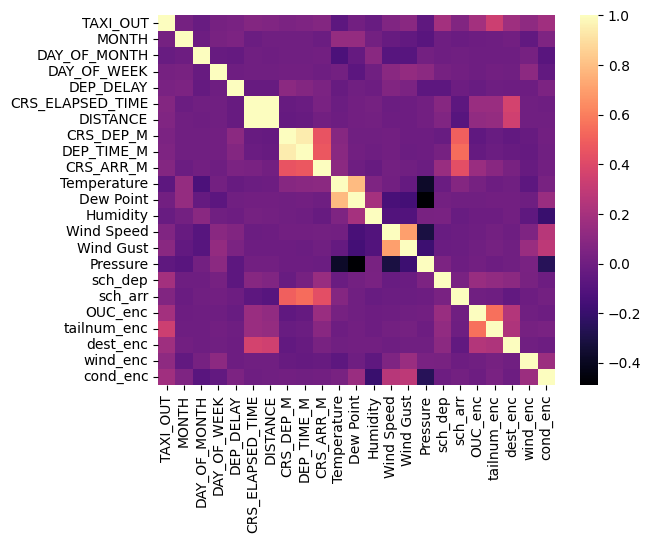

In [17]:
## Plot the heatmap
sns.heatmap(corr_mat, cmap=sns.color_palette("magma", as_cmap=True))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TAXI_OUT          28818 non-null  int64  
 1   MONTH             28818 non-null  int64  
 2   DAY_OF_MONTH      28818 non-null  int64  
 3   DAY_OF_WEEK       28818 non-null  int64  
 4   DEP_DELAY         28818 non-null  int64  
 5   CRS_ELAPSED_TIME  28818 non-null  int64  
 6   DISTANCE          28818 non-null  int64  
 7   CRS_DEP_M         28818 non-null  int64  
 8   DEP_TIME_M        28818 non-null  int64  
 9   CRS_ARR_M         28818 non-null  int64  
 10  Temperature       28818 non-null  int64  
 11  Dew Point         28818 non-null  int64  
 12  Humidity          28818 non-null  int64  
 13  Wind Speed        28818 non-null  int64  
 14  Wind Gust         28818 non-null  int64  
 15  Pressure          28818 non-null  float64
 16  sch_dep           28818 non-null  int64  
 17

In [19]:
## Select the dependent and independent variables
X = data.iloc[:, 1:23]
y = data.iloc[:, 0]

In [20]:
## Split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=31)

In [21]:
## Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
## Using linear regression to make predictions
y_pred = lin_reg.predict(X_test)

In [23]:
## Create a dataframe for predictions
taximodel = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
taximodel

,index,Actual,Predicted
0,7064,16,17.680014
1,2358,16,24.525739
2,20802,29,22.411703
3,23559,17,14.844088
4,3390,16,19.841441
...,...,...,...
9217,15890,19,19.220782
9218,13503,11,19.854502
9219,20779,12,20.575924
9220,3531,18,20.177092


Text(0, 0.5, 'Actual')

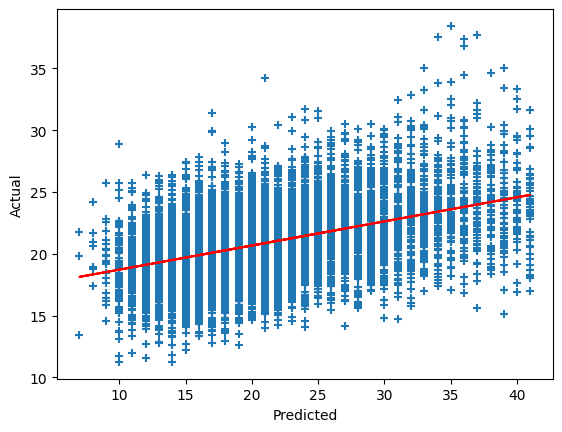

In [24]:
## Chart to compare predictions with actual values
fig, ax = plt.subplots()

plt.scatter(x='Actual', y='Predicted', data=taximodel, marker='+')
a, b = np.polyfit(taximodel['Actual'], taximodel['Predicted'], 1)
plt.plot(taximodel['Actual'], a*taximodel['Actual']+b, color = 'red')

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
## Model evaluation
## Mean absolute error
## Mean square error
## Root mean square error
## Rsquared

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.831829023375129
MSE: 37.39326832891337
RMSE: 6.115003542837353
R2: 0.20047378241717184


## Lasso and Ridge models

In [26]:
## Lasso regression
## Define model
model_lasso = Lasso(alpha=0.1)

## Train  model
model_lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [27]:
## Use lasso regression to make predictions
y_pred = model_lasso.predict(X_test)

In [28]:
## Create a dataframe for predictions
lassotaximodel = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
lassotaximodel

,index,Actual,Predicted
0,7064,16,17.623954
1,2358,16,24.407509
2,20802,29,22.479842
3,23559,17,15.057278
4,3390,16,20.158358
...,...,...,...
9217,15890,19,19.628432
9218,13503,11,19.285856
9219,20779,12,20.793094
9220,3531,18,20.388802


In [29]:
## Model evaluation
## Mean absolute error
## Mean square error
## Root mean square error
## Rsquared

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.840653166266651
MSE: 37.45776804508983
RMSE: 6.120275160896758
R2: 0.1990946781983023


In [30]:
## Ridge regression
## Define model
model_ridge = Ridge(alpha=10)

## Train model
model_ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [31]:
## Use ridge regression to make predictions
y_pred = model_ridge.predict(X_test)

In [32]:
## Create a dataframe for predictions
ridgetaximodel = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
ridgetaximodel

,index,Actual,Predicted
0,7064,16,17.678321
1,2358,16,24.525461
2,20802,29,22.410894
3,23559,17,14.845047
4,3390,16,19.842158
...,...,...,...
9217,15890,19,19.223246
9218,13503,11,19.849653
9219,20779,12,20.576522
9220,3531,18,20.178717


In [33]:
## Model evaluation
## Mean absolute error
## Mean square error
## Root mean square error
## Rsquared

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.831852367158689
MSE: 37.39321134698088
RMSE: 6.114998883645105
R2: 0.20047500077948655


### Conclusion

To create a more accurate model, more correlated variables need to be collected.